# DATASETS: STOCK EXCHANGE DATA

<img align="right" width = "300" src="https://wallpapercave.com/wp/wp4113144.jpg">

This Final Project will be usng a dataset obtain from [Kaggle](https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data). This data sets is related to the stock market with differents Index ranging from year 1965 to 2021. We will be using this to shown the trend and the statistical result (*the moving averange of 10 sample & 20 samples*) of over from the year that available and provide visualization for understanding using both **pandas** and **matplotlib**

Description of the data sets

- **Index** - The market index for the stock market branches 
- **Date** - The date of the market 
- **Open** - The starting price of the market on the day
- **High** - The maximum value that achieved on the day
- **Low** - The minimum value that achieved on the day
- **Close** - The closing value that achieved on the day
- **Adj Close** - The adjusted closing value that achieved on the day
- **Volume** - The trading quantity of the day

In [1]:
# Import the required libraries

import pandas as pd
import matplotlib.pyplot as mp

In [2]:
# Read the csv file that downloaded to further evaluate the info

stock_data = pd.read_csv('C:\\Users\\xc_ch\\Desktop\\Python_workarea\\FYP\\indexData.csv', delimiter=',')
stock_data_dic = pd.read_csv('C:\\Users\\xc_ch\\Desktop\\Python_workarea\\FYP\\indexInfo.csv', delimiter=',')

In [3]:
# Check the data

stock_data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [4]:
# Check the data quantity (columns and rows)

stock_data.shape

(112457, 8)

In [5]:
# Check the list of the columns

list(stock_data.columns)

['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [6]:
# Check the available index

stock_data['Index'].unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

In [7]:
# Create a dictionary to indicate the short form of the Index

dic_index = {'NYA':'New York Stock Exchange',
           'IXIC':'Nasdaq',
           'HSI':'Hong Kong Stock Exchange',
           '000001.SS':'Shanghai Stock Exchange',
           'N225':'Tokyo Stock Exchange',
           'N100':'Euronet',
           '399001.SZ':'Shenzhen Stock Exchange',
           'GSPTSE':'Toronto Stock Exchange',
           'NSEI':'National Stock Exchange of India',
           'GDAXI':'Franfurk Stock Exchange',
           'KS11':'Korea Exchange',
           'SSMI':'SIX Swiss Exchange',
           'TWII':'Taiwan Stock Exchange',
           'J203.JO':'Johannesburg Stock Exchange'}

In [8]:
# Using for loop to read all the index and the short form

for x,y in dic_index.items():
    print(f'{x}:{y}')

NYA:New York Stock Exchange
IXIC:Nasdaq
HSI:Hong Kong Stock Exchange
000001.SS:Shanghai Stock Exchange
N225:Tokyo Stock Exchange
N100:Euronet
399001.SZ:Shenzhen Stock Exchange
GSPTSE:Toronto Stock Exchange
NSEI:National Stock Exchange of India
GDAXI:Franfurk Stock Exchange
KS11:Korea Exchange
SSMI:SIX Swiss Exchange
TWII:Taiwan Stock Exchange
J203.JO:Johannesburg Stock Exchange


In [9]:
# Check the amoount of null in the dataframe

pd.DataFrame(stock_data.isnull().sum())

,0
Index,0
Date,0
Open,2204
High,2204
Low,2204
Close,2204
Adj Close,2204
Volume,2204


In [10]:
# Identify the percentage of Null values and compared in terms of percentage

null_df = pd.DataFrame(stock_data.isnull().sum(), columns = ['Count of Nulls'])
null_df.index.name = "Index"
null_df['Null_Percentage'] = pd.DataFrame(null_df/stock_data.shape[0])*100
null_df

,Count of Nulls,Null_Percentage
Index,,
Index,0,0.00000
Date,0,0.00000
Open,2204,1.95986
High,2204,1.95986
Low,2204,1.95986
Close,2204,1.95986
Adj Close,2204,1.95986
Volume,2204,1.95986


In [11]:
# remove the null values

stock_data = stock_data.dropna()

In [12]:
# Rename the volumn into quantity and save to original files

stock_data.rename(columns ={'Volume':'Quantity'},inplace = True)
pd.DataFrame(stock_data.dtypes,columns=['DataType'])

C:\Users\xc_ch\AppData\Local\Temp\ipykernel_15080\1438330612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns ={'Volume':'Quantity'},inplace = True)


,DataType
Index,object
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Quantity,float64


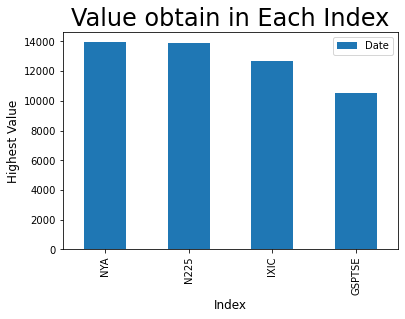

In [13]:
# Group the the data by index and identify the top 4 for futher data visualization

stock_data.groupby(['Index']).count().sort_values('Date',ascending=False).head(4)[['Date']].plot(kind = 'bar', stacked = True)
mp.xlabel('Index', fontsize = 12)
mp.ylabel('Highest Value', fontsize = 12)
mp.title('Value obtain in Each Index',fontsize = 24)

figure_highest = mp.gcf()

In [14]:
# Save the data of each dataframe into different variables

index_values = ['NYA', 'N225', 'IXIC', 'GSPTSE']
dfs = {}

for index in index_values:
    df = pd.DataFrame(stock_data[stock_data.Index == index]).set_index('Date')
    dfs[f"df_{index}"] = df

# Access the individual DataFrames
df_NYA = dfs['df_NYA']
df_N225 = dfs['df_N225']
df_IXIC = dfs['df_IXIC']
df_GSPTSE = dfs['df_GSPTSE']

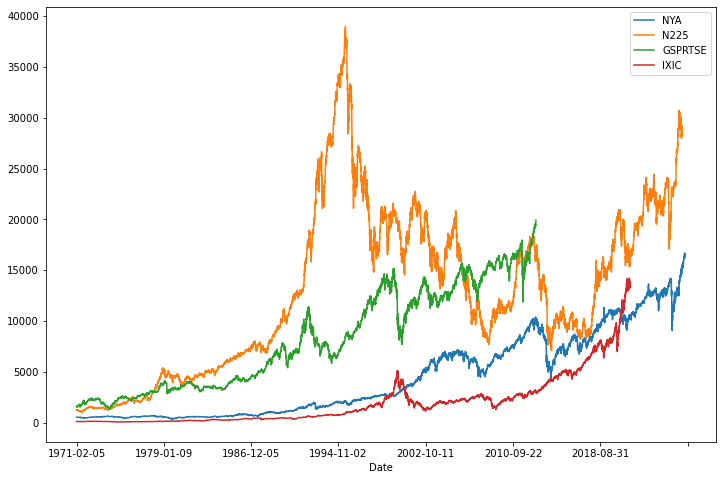

In [15]:
# Plot the High value of each dataframe

NYA_graph = df_NYA['High'].plot(fontsize = 10,figsize=(12,8),label ='NYA')
N225_graph = df_N225['High'].plot(fontsize = 10,figsize=(12,8),label ='N225')
GSPRTSE_graph = df_GSPTSE ['High'].plot(fontsize = 10,figsize=(12,8),label ='GSPRTSE')
IXIC_graph = df_IXIC ['High'].plot(fontsize = 10,figsize=(12,8),label ='IXIC')

mp.legend()
mp.show()

In [16]:
# Moving average of 10 samples

df_list = [df_NYA['High'],df_N225['High'],df_GSPTSE['High'],df_IXIC['High']]

# For loop for saving the variables and add new columns

for df in range(len(df_list)):
    dfs = {}
    
    #convert to frame and rename high 
    df = df_list[df].to_frame(name='High')
    
    #calculate the mean values
    df = df.rolling(10,min_periods=1).mean()
    
    for index in index_values:
        dfs[f"df_{index}"] = df 
            
# Access the individual DataFrames
df_NYA['SMA_10'] = dfs['df_NYA']
df_N225['SMA_10'] = dfs['df_N225']
df_IXIC['SMA_10'] = dfs['df_IXIC']
df_GSPTSE['SMA_10'] = dfs['df_GSPTSE']

# Moving average of 20 samples

for df in range(len(df_list)):
    dfs = {}
    df = df_list[df].to_frame(name='High')
    df = df.rolling(20,min_periods=1).mean()
    for index in index_values:
        dfs[f"df_{index}"] = df 
        
# Access the individual DataFrames        
df_NYA['SMA_20'] = dfs['df_NYA']
df_N225['SMA_20'] = dfs['df_N225']
df_IXIC['SMA_20'] = dfs['df_IXIC']
df_GSPTSE['SMA_20'] = dfs['df_GSPTSE']


In [17]:
# Save the new data frame into csv

df_NYA.to_csv("path_to_file_NYA.csv", sep=' ')
df_N225.to_csv("path_to_file_N225.csv", sep=' ')
df_IXIC.to_csv("path_to_file_IXIC.csv", sep=' ')
df_GSPTSE.to_csv("path_to_file_GSPTSE.csv", sep=' ')

In [18]:
# Read the CSV files into DataFrames
df_NYA = pd.read_csv("path_to_file_NYA.csv",delimiter = ' ')
df_N225 = pd.read_csv("path_to_file_N225.csv",delimiter = ' ')
df_IXIC = pd.read_csv("path_to_file_IXIC.csv",delimiter = ' ')
df_GSPTSE = pd.read_csv("path_to_file_GSPTSE.csv",delimiter = ' ')

# Setting date as Index
df_NYA.set_index('Date')
df_N225.set_index('Date')
df_IXIC.set_index('Date')
df_GSPTSE.set_index('Date')

# Fucntion to read the graph that wanted
def graph_market():
    
    index_values = ['NYA', 'N225', 'IXIC', 'GSPTSE']

    
    while True:
        try:
            y = input("Please enter a market: ")

            if y not in index_values:
                print("Invalid market. Please enter one of the following: NYA, N225, IXIC, GSPTSE")
                continue

            # Get the DataFrame based on the user input
            if y == 'NYA':
                selected_df = df_NYA
            elif y == 'N225':
                selected_df = df_N225
            elif y == 'IXIC':
                selected_df = df_IXIC
            elif y == 'GSPTSE':
                selected_df = df_GSPTSE

            # Select the specified columns for the chosen market
            selected_columns = selected_df[['High', 'SMA_10', 'SMA_20']]

            # Plot the selected columns
            selected_columns.plot(fontsize=10, figsize=(12, 8), title=y)
            mp.ylabel('Value')
            mp.show()

            break  # Exit the loop after successful plot
        
        except Exception as e:
            print(f"An error occurred: {str(e)}")

Please enter a market: NYA


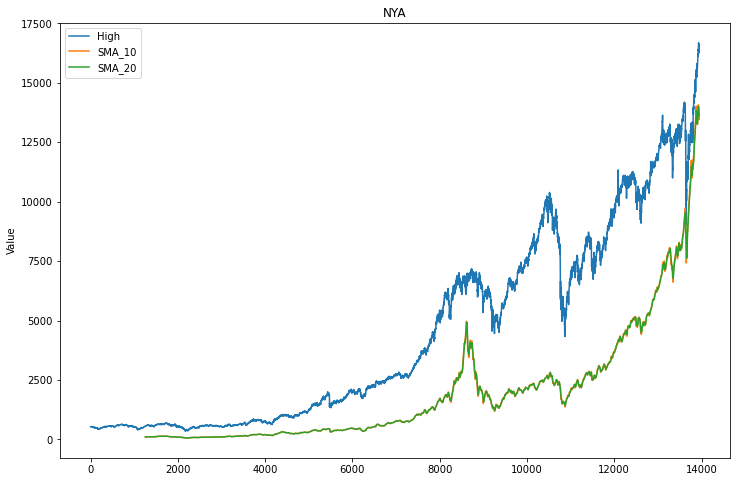

In [19]:
graph_market()